In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 750)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [1, 0, 1, 1], [0, 0, 0, 0], [1, 0, 0, 1], [1, 1, 1, 0], [1, 1, 0, 1], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 1, 1], [0, 0, 1, 0]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:815
number of class2:802

 ****** Running generation 0 ****** 

Population's average fitness: 0.49482 stdev: 0.05027
Best fitness: 0.65925 - size: (2, 13) - species 2 - id 123
Average adjusted fitness: 0.190
Mean genetic distance 2.904, standard deviation 0.468
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.416 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51996 stdev: 0.04915
Best fitness: 0.65925 - size: (2, 13) - species 2 - id 123
Average adjusted fitness: 0.161
Mean genetic distance 2.983, standard deviation 0.486
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 14.070 sec (13.743 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53639 stdev: 0.05161
Best fitness: 0.70130 - size: (3, 14) - species 1 - id 517
Average adjusted fitness: 0.103
Mean genetic distance 2.966, standard deviation 0.511
Population of 203 members in 30 species
Total extinc

Population's average fitness: 0.59471 stdev: 0.07097
Best fitness: 0.75077 - size: (6, 20) - species 40 - id 2776
Average adjusted fitness: 0.237
Mean genetic distance 3.216, standard deviation 0.484
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 21.212 sec (17.947 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59532 stdev: 0.07179
Best fitness: 0.75077 - size: (6, 20) - species 40 - id 2776
Average adjusted fitness: 0.172
Mean genetic distance 3.222, standard deviation 0.488
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 20.414 sec (18.231 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60529 stdev: 0.06618
Best fitness: 0.75077 - size: (6, 20) - species 40 - id 2776
Average adjusted fitness: 0.132
Mean genetic distance 3.236, standard deviation 0.476
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 21.935 sec (18.585 average)

 

Population's average fitness: 0.60864 stdev: 0.07985
Best fitness: 0.76500 - size: (5, 17) - species 41 - id 4220
Average adjusted fitness: 0.169
Mean genetic distance 3.223, standard deviation 0.543
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 20.126 sec (20.669 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.61059 stdev: 0.07847
Best fitness: 0.76500 - size: (5, 17) - species 41 - id 4220
Average adjusted fitness: 0.210
Mean genetic distance 3.230, standard deviation 0.534
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 19.287 sec (20.500 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.60412 stdev: 0.08386
Best fitness: 0.76500 - size: (5, 17) - species 41 - id 4220
Average adjusted fitness: 0.233
Mean genetic distance 3.218, standard deviation 0.545
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 19.745 sec (20.079 average)

 

Population's average fitness: 0.59967 stdev: 0.08353
Best fitness: 0.76500 - size: (5, 17) - species 41 - id 4220
Average adjusted fitness: 0.172
Mean genetic distance 3.155, standard deviation 0.578
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 20.091 sec (20.217 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.60157 stdev: 0.08848
Best fitness: 0.76500 - size: (5, 17) - species 41 - id 4220
Average adjusted fitness: 0.202
Mean genetic distance 3.159, standard deviation 0.556
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 20.113 sec (20.217 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.60323 stdev: 0.08331
Best fitness: 0.76500 - size: (5, 17) - species 41 - id 4220
Average adjusted fitness: 0.191
Mean genetic distance 3.185, standard deviation 0.572
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 19.706 sec (20.154 average)

 

Population's average fitness: 0.62844 stdev: 0.08409
Best fitness: 0.76500 - size: (5, 17) - species 41 - id 4220
Average adjusted fitness: 0.222
Mean genetic distance 3.188, standard deviation 0.584
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 23.014 sec (21.260 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.62686 stdev: 0.08246
Best fitness: 0.76500 - size: (5, 17) - species 41 - id 4220
Average adjusted fitness: 0.179
Mean genetic distance 3.205, standard deviation 0.595
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 22.879 sec (21.505 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.62388 stdev: 0.08350
Best fitness: 0.76500 - size: (5, 17) - species 41 - id 4220
Average adjusted fitness: 0.136
Mean genetic distance 3.137, standard deviation 0.595
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 24.295 sec (21.877 average)

 

Population's average fitness: 0.61536 stdev: 0.07846
Best fitness: 0.76685 - size: (9, 24) - species 60 - id 16681
Average adjusted fitness: 0.188
Mean genetic distance 3.102, standard deviation 0.555
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 22.520 sec (23.170 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.61096 stdev: 0.08351
Best fitness: 0.76685 - size: (9, 24) - species 60 - id 16681
Average adjusted fitness: 0.181
Mean genetic distance 3.082, standard deviation 0.582
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 22.949 sec (23.004 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.61912 stdev: 0.07790
Best fitness: 0.76685 - size: (9, 24) - species 60 - id 16681
Average adjusted fitness: 0.200
Mean genetic distance 3.099, standard deviation 0.571
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 23.330 sec (22.996 averag

Population's average fitness: 0.62224 stdev: 0.07979
Best fitness: 0.76747 - size: (5, 16) - species 97 - id 21984
Average adjusted fitness: 0.148
Mean genetic distance 2.857, standard deviation 0.516
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 20.991 sec (21.452 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.62074 stdev: 0.08159
Best fitness: 0.76747 - size: (5, 16) - species 97 - id 21984
Average adjusted fitness: 0.186
Mean genetic distance 2.807, standard deviation 0.523
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 29.320 sec (22.111 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.63546 stdev: 0.08220
Best fitness: 0.76747 - size: (5, 16) - species 97 - id 21984
Average adjusted fitness: 0.181
Mean genetic distance 2.808, standard deviation 0.513
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 24.147 sec (22.344 averag

Population's average fitness: 0.63024 stdev: 0.08458
Best fitness: 0.77118 - size: (8, 23) - species 94 - id 23317
Average adjusted fitness: 0.187
Mean genetic distance 2.867, standard deviation 0.513
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 22.615 sec (22.846 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.63007 stdev: 0.08126
Best fitness: 0.77118 - size: (8, 23) - species 94 - id 23317
Average adjusted fitness: 0.176
Mean genetic distance 2.865, standard deviation 0.510
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 22.067 sec (22.616 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.62066 stdev: 0.08426
Best fitness: 0.77118 - size: (8, 23) - species 94 - id 23317
Average adjusted fitness: 0.163
Mean genetic distance 2.869, standard deviation 0.507
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 22.102 sec (22.690 averag

Population's average fitness: 0.63956 stdev: 0.08571
Best fitness: 0.77427 - size: (9, 26) - species 116 - id 28789
Average adjusted fitness: 0.178
Mean genetic distance 2.895, standard deviation 0.469
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 19.519 sec (20.587 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.63904 stdev: 0.08792
Best fitness: 0.77427 - size: (9, 26) - species 116 - id 28789
Average adjusted fitness: 0.162
Mean genetic distance 2.886, standard deviation 0.467
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 19.698 sec (20.670 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.64436 stdev: 0.08304
Best fitness: 0.77427 - size: (9, 26) - species 116 - id 28789
Average adjusted fitness: 0.150
Mean genetic distance 2.898, standard deviation 0.459
Population of 205 members in 22 species
Total extinctions: 0
Generation time: 20.610 sec (20.807 ave

Population's average fitness: 0.62522 stdev: 0.08761
Best fitness: 0.77427 - size: (9, 26) - species 123 - id 28789
Average adjusted fitness: 0.236
Mean genetic distance 2.984, standard deviation 0.524
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 22.456 sec (20.657 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.62454 stdev: 0.08791
Best fitness: 0.77427 - size: (9, 26) - species 123 - id 28789
Average adjusted fitness: 0.199
Mean genetic distance 3.007, standard deviation 0.519
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 23.883 sec (20.957 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.63118 stdev: 0.08422
Best fitness: 0.77427 - size: (9, 26) - species 123 - id 28789
Average adjusted fitness: 0.195
Mean genetic distance 2.990, standard deviation 0.516
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 24.282 sec (21.292 ave

Population's average fitness: 0.64339 stdev: 0.08521
Best fitness: 0.77427 - size: (9, 26) - species 123 - id 28789
Average adjusted fitness: 0.193
Mean genetic distance 3.023, standard deviation 0.489
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 21.095 sec (20.602 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.64507 stdev: 0.08596
Best fitness: 0.77427 - size: (9, 26) - species 123 - id 28789
Average adjusted fitness: 0.289
Mean genetic distance 3.008, standard deviation 0.492
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 20.717 sec (20.669 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.64716 stdev: 0.08388
Best fitness: 0.77427 - size: (9, 26) - species 123 - id 28789
Average adjusted fitness: 0.263
Mean genetic distance 3.006, standard deviation 0.502
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 20.885 sec (20.716 ave

Population's average fitness: 0.64045 stdev: 0.08598
Best fitness: 0.77427 - size: (11, 31) - species 116 - id 40719
Average adjusted fitness: 0.142
Mean genetic distance 3.003, standard deviation 0.512
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 23.830 sec (47.277 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.64569 stdev: 0.08288
Best fitness: 0.77427 - size: (11, 31) - species 116 - id 40719
Average adjusted fitness: 0.159
Mean genetic distance 3.022, standard deviation 0.502
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 24.673 sec (47.508 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.63714 stdev: 0.08395
Best fitness: 0.77427 - size: (11, 31) - species 116 - id 40719
Average adjusted fitness: 0.139
Mean genetic distance 2.996, standard deviation 0.520
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 25.027 sec (29.497 

Mean genetic distance 3.032, standard deviation 0.549
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 25.321 sec (25.715 average)

 ****** Running generation 288 ****** 

Population's average fitness: 0.63458 stdev: 0.08700
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.136
Mean genetic distance 3.025, standard deviation 0.545
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 25.287 sec (25.448 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.62670 stdev: 0.08589
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.159
Mean genetic distance 2.989, standard deviation 0.562
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 25.411 sec (25.363 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.62876 stdev: 0.08390
Best fitness: 0.77984 - size: (14, 34) - speci

Population's average fitness: 0.63330 stdev: 0.08776
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.166
Mean genetic distance 3.023, standard deviation 0.517
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 25.849 sec (26.106 average)

 ****** Running generation 312 ****** 

Population's average fitness: 0.63989 stdev: 0.08611
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.171
Mean genetic distance 3.036, standard deviation 0.518
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 27.570 sec (26.315 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.63599 stdev: 0.08510
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.185
Mean genetic distance 3.003, standard deviation 0.532
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 26.431 sec (26.405 

Mean genetic distance 3.065, standard deviation 0.577
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 28.159 sec (26.978 average)

 ****** Running generation 335 ****** 

Population's average fitness: 0.61711 stdev: 0.08998
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.217
Mean genetic distance 3.120, standard deviation 0.566
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 29.211 sec (27.343 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.60951 stdev: 0.09043
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.144
Mean genetic distance 3.135, standard deviation 0.587
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 27.753 sec (27.359 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.62921 stdev: 0.08270
Best fitness: 0.77984 - size: (14, 34) - speci

Population's average fitness: 0.64671 stdev: 0.08366
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.150
Mean genetic distance 3.076, standard deviation 0.612
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 23.798 sec (24.308 average)

 ****** Running generation 359 ****** 

Population's average fitness: 0.63968 stdev: 0.08394
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.190
Mean genetic distance 3.102, standard deviation 0.611
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 24.337 sec (24.297 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.64892 stdev: 0.07773
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.201
Mean genetic distance 3.033, standard deviation 0.626
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 24.810 sec (24.314 

Mean genetic distance 2.999, standard deviation 0.602
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 25.247 sec (24.615 average)

 ****** Running generation 382 ****** 

Population's average fitness: 0.63056 stdev: 0.09048
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.249
Mean genetic distance 2.982, standard deviation 0.606
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 27.762 sec (24.954 average)

 ****** Running generation 383 ****** 

Population's average fitness: 0.62694 stdev: 0.09511
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.304
Mean genetic distance 2.980, standard deviation 0.610
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 25.828 sec (25.122 average)

 ****** Running generation 384 ****** 

Population's average fitness: 0.64009 stdev: 0.08530
Best fitness: 0.77984 - size: (14, 34) - speci

Population's average fitness: 0.63572 stdev: 0.08829
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.189
Mean genetic distance 2.907, standard deviation 0.459
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 30.116 sec (27.373 average)

 ****** Running generation 406 ****** 

Population's average fitness: 0.63055 stdev: 0.08723
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.164
Mean genetic distance 2.927, standard deviation 0.452
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 29.611 sec (27.733 average)

 ****** Running generation 407 ****** 

Population's average fitness: 0.62508 stdev: 0.09429
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.218
Mean genetic distance 2.959, standard deviation 0.468
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 29.088 sec (28.144 

Mean genetic distance 2.839, standard deviation 0.502
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 27.321 sec (26.495 average)

 ****** Running generation 429 ****** 

Population's average fitness: 0.62689 stdev: 0.09029
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.278
Mean genetic distance 2.883, standard deviation 0.514
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 26.648 sec (26.511 average)

 ****** Running generation 430 ****** 

Population's average fitness: 0.63192 stdev: 0.08290
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.237
Mean genetic distance 2.885, standard deviation 0.503
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 26.548 sec (26.592 average)

 ****** Running generation 431 ****** 

Population's average fitness: 0.63023 stdev: 0.08629
Best fitness: 0.77984 - size: (14, 34) - speci

Population's average fitness: 0.64534 stdev: 0.08492
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.174
Mean genetic distance 2.851, standard deviation 0.521
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 30.828 sec (30.829 average)

 ****** Running generation 453 ****** 

Population's average fitness: 0.63541 stdev: 0.09137
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.209
Mean genetic distance 2.859, standard deviation 0.526
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 30.434 sec (30.946 average)

 ****** Running generation 454 ****** 

Population's average fitness: 0.63450 stdev: 0.08486
Best fitness: 0.77984 - size: (14, 34) - species 144 - id 45737
Average adjusted fitness: 0.235
Mean genetic distance 2.864, standard deviation 0.526
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 30.923 sec (31.084 

Mean genetic distance 2.880, standard deviation 0.534
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 26.685 sec (29.690 average)

 ****** Running generation 476 ****** 

Population's average fitness: 0.64522 stdev: 0.08237
Best fitness: 0.78850 - size: (25, 60) - species 194 - id 78308
Average adjusted fitness: 0.150
Mean genetic distance 2.850, standard deviation 0.523
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 26.564 sec (29.367 average)

 ****** Running generation 477 ****** 

Population's average fitness: 0.65254 stdev: 0.08439
Best fitness: 0.78850 - size: (25, 60) - species 194 - id 78308
Average adjusted fitness: 0.228
Mean genetic distance 2.870, standard deviation 0.495
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 25.864 sec (28.684 average)

 ****** Running generation 478 ****** 

Population's average fitness: 0.64652 stdev: 0.08245
Best fitness: 0.78850 - size: (25, 60) - speci

Population's average fitness: 0.64184 stdev: 0.08091
Best fitness: 0.78850 - size: (25, 60) - species 194 - id 78308
Average adjusted fitness: 0.208
Mean genetic distance 2.935, standard deviation 0.560
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 24.297 sec (24.287 average)

 ****** Running generation 500 ****** 

Population's average fitness: 0.63268 stdev: 0.08476
Best fitness: 0.78850 - size: (25, 60) - species 194 - id 78308
Average adjusted fitness: 0.200
Mean genetic distance 2.939, standard deviation 0.541
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 23.980 sec (23.941 average)

 ****** Running generation 501 ****** 

Population's average fitness: 0.64522 stdev: 0.08048
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.145
Mean genetic distance 2.913, standard deviation 0.563
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 23.860 sec (24.052 

Mean genetic distance 2.927, standard deviation 0.580
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 25.800 sec (25.648 average)

 ****** Running generation 523 ****** 

Population's average fitness: 0.62675 stdev: 0.08767
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.185
Mean genetic distance 2.934, standard deviation 0.574
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 25.181 sec (25.616 average)

 ****** Running generation 524 ****** 

Population's average fitness: 0.63289 stdev: 0.08934
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.272
Mean genetic distance 2.936, standard deviation 0.581
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 24.336 sec (25.187 average)

 ****** Running generation 525 ****** 

Population's average fitness: 0.63226 stdev: 0.09020
Best fitness: 0.79592 - size: (24, 55) - speci

Population's average fitness: 0.64228 stdev: 0.08304
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.158
Mean genetic distance 2.866, standard deviation 0.511
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 28.700 sec (27.540 average)

 ****** Running generation 547 ****** 

Population's average fitness: 0.64516 stdev: 0.08442
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.152
Mean genetic distance 2.845, standard deviation 0.539
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 28.273 sec (27.840 average)

 ****** Running generation 548 ****** 

Population's average fitness: 0.65481 stdev: 0.08021
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.223
Mean genetic distance 2.835, standard deviation 0.532
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 28.493 sec (27.764 

Mean genetic distance 2.928, standard deviation 0.505
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 26.378 sec (26.965 average)

 ****** Running generation 570 ****** 

Population's average fitness: 0.64627 stdev: 0.08789
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.251
Mean genetic distance 2.916, standard deviation 0.511
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 27.958 sec (27.099 average)

 ****** Running generation 571 ****** 

Population's average fitness: 0.65115 stdev: 0.08836
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.221
Mean genetic distance 2.924, standard deviation 0.517
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 25.667 sec (26.973 average)

 ****** Running generation 572 ****** 

Population's average fitness: 0.65049 stdev: 0.08486
Best fitness: 0.79592 - size: (24, 55) - speci

Population's average fitness: 0.65870 stdev: 0.08256
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.158
Mean genetic distance 2.935, standard deviation 0.562
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 28.293 sec (26.779 average)

 ****** Running generation 594 ****** 

Population's average fitness: 0.64387 stdev: 0.08590
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.211
Mean genetic distance 2.942, standard deviation 0.550
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 28.766 sec (27.211 average)

 ****** Running generation 595 ****** 

Population's average fitness: 0.65551 stdev: 0.07839
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.158
Mean genetic distance 2.947, standard deviation 0.561
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 29.556 sec (27.708 

Mean genetic distance 3.089, standard deviation 0.497
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 30.939 sec (30.998 average)

 ****** Running generation 617 ****** 

Population's average fitness: 0.63989 stdev: 0.08592
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.198
Mean genetic distance 3.085, standard deviation 0.490
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 28.358 sec (30.827 average)

 ****** Running generation 618 ****** 

Population's average fitness: 0.63964 stdev: 0.08228
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.178
Mean genetic distance 3.088, standard deviation 0.505
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 28.674 sec (30.553 average)

 ****** Running generation 619 ****** 

Population's average fitness: 0.65313 stdev: 0.08084
Best fitness: 0.79592 - size: (24, 55) - speci

Population's average fitness: 0.65059 stdev: 0.08589
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.292
Mean genetic distance 3.069, standard deviation 0.500
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 31.224 sec (31.061 average)

 ****** Running generation 641 ****** 

Population's average fitness: 0.64942 stdev: 0.08108
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.240
Mean genetic distance 3.053, standard deviation 0.507
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 31.826 sec (31.492 average)

 ****** Running generation 642 ****** 

Population's average fitness: 0.64520 stdev: 0.08875
Best fitness: 0.79592 - size: (24, 55) - species 178 - id 83464
Average adjusted fitness: 0.185
Mean genetic distance 3.044, standard deviation 0.497
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 35.534 sec (31.827 

Mean genetic distance 2.923, standard deviation 0.566
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 38.972 sec (33.021 average)

 ****** Running generation 664 ****** 

Population's average fitness: 0.63823 stdev: 0.08210
Best fitness: 0.79654 - size: (25, 57) - species 178 - id 109921
Average adjusted fitness: 0.184
Mean genetic distance 2.943, standard deviation 0.534
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 32.704 sec (33.181 average)

 ****** Running generation 665 ****** 

Population's average fitness: 0.63914 stdev: 0.08515
Best fitness: 0.79654 - size: (25, 57) - species 178 - id 109921
Average adjusted fitness: 0.185
Mean genetic distance 2.944, standard deviation 0.506
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 30.372 sec (32.977 average)

 ****** Running generation 666 ****** 

Population's average fitness: 0.63648 stdev: 0.08318
Best fitness: 0.79654 - size: (25, 57) - specie

Population's average fitness: 0.62699 stdev: 0.08974
Best fitness: 0.79654 - size: (25, 57) - species 178 - id 109921
Average adjusted fitness: 0.214
Mean genetic distance 2.964, standard deviation 0.507
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 43.859 sec (41.237 average)

 ****** Running generation 688 ****** 

Population's average fitness: 0.63625 stdev: 0.08335
Best fitness: 0.79654 - size: (25, 57) - species 178 - id 109921
Average adjusted fitness: 0.209
Mean genetic distance 2.931, standard deviation 0.510
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 39.801 sec (40.932 average)

 ****** Running generation 689 ****** 

Population's average fitness: 0.63681 stdev: 0.08275
Best fitness: 0.79654 - size: (25, 57) - species 178 - id 109921
Average adjusted fitness: 0.180
Mean genetic distance 2.939, standard deviation 0.500
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 41.839 sec (41.1

Mean genetic distance 2.979, standard deviation 0.558
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 37.098 sec (40.203 average)

 ****** Running generation 711 ****** 

Population's average fitness: 0.63918 stdev: 0.08072
Best fitness: 0.79654 - size: (25, 57) - species 178 - id 109921
Average adjusted fitness: 0.160
Mean genetic distance 2.982, standard deviation 0.551
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 41.594 sec (40.325 average)

 ****** Running generation 712 ****** 

Population's average fitness: 0.64907 stdev: 0.08261
Best fitness: 0.79654 - size: (25, 57) - species 178 - id 109921
Average adjusted fitness: 0.175
Mean genetic distance 3.000, standard deviation 0.511
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 41.200 sec (40.395 average)

 ****** Running generation 713 ****** 

Population's average fitness: 0.64758 stdev: 0.08445
Best fitness: 0.79654 - size: (25, 57) - spe

Population's average fitness: 0.63806 stdev: 0.08733
Best fitness: 0.79654 - size: (25, 57) - species 178 - id 109921
Average adjusted fitness: 0.183
Mean genetic distance 2.944, standard deviation 0.499
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 41.946 sec (40.687 average)

 ****** Running generation 735 ****** 

Population's average fitness: 0.65392 stdev: 0.08306
Best fitness: 0.79654 - size: (25, 57) - species 178 - id 109921
Average adjusted fitness: 0.245
Mean genetic distance 2.945, standard deviation 0.506
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 40.043 sec (40.692 average)

 ****** Running generation 736 ****** 

Population's average fitness: 0.64716 stdev: 0.08384
Best fitness: 0.79654 - size: (25, 57) - species 178 - id 109921
Average adjusted fitness: 0.179
Mean genetic distance 2.938, standard deviation 0.518
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 46.638 sec (41.6

Population's average fitness: 0.61043 stdev: 0.09647
Best fitness: 0.81323 - size: (6, 23) - species 14 - id 935
Average adjusted fitness: 0.190
Mean genetic distance 3.132, standard deviation 0.483
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 24.492 sec (21.105 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61152 stdev: 0.10004
Best fitness: 0.82189 - size: (7, 24) - species 14 - id 1473
Average adjusted fitness: 0.236
Mean genetic distance 3.143, standard deviation 0.465
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 24.400 sec (21.435 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62123 stdev: 0.09907
Best fitness: 0.82189 - size: (7, 24) - species 14 - id 1473
Average adjusted fitness: 0.233
Mean genetic distance 3.182, standard deviation 0.463
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 24.086 sec (21.939 average)

 **

Population's average fitness: 0.64498 stdev: 0.10656
Best fitness: 0.82808 - size: (7, 22) - species 4 - id 4284
Average adjusted fitness: 0.299
Mean genetic distance 3.304, standard deviation 0.508
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 26.921 sec (28.708 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.64940 stdev: 0.10387
Best fitness: 0.82931 - size: (7, 23) - species 4 - id 4426
Average adjusted fitness: 0.204
Mean genetic distance 3.268, standard deviation 0.512
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 25.046 sec (28.272 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.64516 stdev: 0.10912
Best fitness: 0.82931 - size: (7, 23) - species 4 - id 4426
Average adjusted fitness: 0.251
Mean genetic distance 3.309, standard deviation 0.498
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 27.142 sec (28.175 average)

 ***

Population's average fitness: 0.63506 stdev: 0.11029
Best fitness: 0.83426 - size: (8, 24) - species 4 - id 5618
Average adjusted fitness: 0.341
Mean genetic distance 3.345, standard deviation 0.569
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 29.317 sec (30.456 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.63981 stdev: 0.12010
Best fitness: 0.83426 - size: (8, 24) - species 4 - id 5618
Average adjusted fitness: 0.355
Mean genetic distance 3.337, standard deviation 0.569
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 28.303 sec (30.247 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.63828 stdev: 0.12266
Best fitness: 0.83426 - size: (8, 24) - species 4 - id 5618
Average adjusted fitness: 0.308
Mean genetic distance 3.313, standard deviation 0.585
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 29.273 sec (29.905 average)

 ***

Population's average fitness: 0.65313 stdev: 0.12398
Best fitness: 0.83426 - size: (8, 24) - species 4 - id 5618
Average adjusted fitness: 0.215
Mean genetic distance 3.237, standard deviation 0.554
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 26.269 sec (31.230 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.66675 stdev: 0.11481
Best fitness: 0.83426 - size: (8, 24) - species 4 - id 5618
Average adjusted fitness: 0.250
Mean genetic distance 3.230, standard deviation 0.560
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 28.473 sec (30.895 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.65059 stdev: 0.12197
Best fitness: 0.83426 - size: (8, 24) - species 4 - id 5618
Average adjusted fitness: 0.260
Mean genetic distance 3.249, standard deviation 0.586
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 27.675 sec (30.388 average)

 ***

Population's average fitness: 0.65601 stdev: 0.12427
Best fitness: 0.83426 - size: (8, 24) - species 4 - id 5618
Average adjusted fitness: 0.294
Mean genetic distance 3.098, standard deviation 0.630
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 36.132 sec (32.957 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.67115 stdev: 0.12667
Best fitness: 0.83426 - size: (8, 24) - species 4 - id 5618
Average adjusted fitness: 0.370
Mean genetic distance 3.092, standard deviation 0.626
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 45.461 sec (34.109 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.68028 stdev: 0.12079
Best fitness: 0.83426 - size: (8, 24) - species 4 - id 5618
Average adjusted fitness: 0.371
Mean genetic distance 3.092, standard deviation 0.631
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 37.153 sec (34.697 average)

 *

Population's average fitness: 0.68457 stdev: 0.12588
Best fitness: 0.83612 - size: (21, 46) - species 69 - id 20320
Average adjusted fitness: 0.375
Mean genetic distance 3.150, standard deviation 0.621
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 40.327 sec (39.327 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.67211 stdev: 0.12423
Best fitness: 0.83612 - size: (21, 46) - species 69 - id 20320
Average adjusted fitness: 0.371
Mean genetic distance 3.158, standard deviation 0.672
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 42.617 sec (40.081 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.67793 stdev: 0.12481
Best fitness: 0.83612 - size: (21, 46) - species 69 - id 20320
Average adjusted fitness: 0.252
Mean genetic distance 3.177, standard deviation 0.649
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 40.668 sec (40.499 ave

Population's average fitness: 0.67735 stdev: 0.12887
Best fitness: 0.83797 - size: (20, 44) - species 69 - id 22773
Average adjusted fitness: 0.369
Mean genetic distance 3.027, standard deviation 0.568
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 49.177 sec (41.295 average)

 ****** Running generation 153 ****** 

Population's average fitness: 0.67805 stdev: 0.12462
Best fitness: 0.83797 - size: (20, 44) - species 69 - id 22773
Average adjusted fitness: 0.287
Mean genetic distance 2.981, standard deviation 0.552
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 41.137 sec (41.505 average)

 ****** Running generation 154 ****** 

Population's average fitness: 0.69775 stdev: 0.12040
Best fitness: 0.83797 - size: (20, 44) - species 69 - id 22773
Average adjusted fitness: 0.349
Mean genetic distance 2.991, standard deviation 0.544
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 35.267 sec (41.362 ave

Population's average fitness: 0.69028 stdev: 0.12604
Best fitness: 0.83797 - size: (20, 44) - species 69 - id 22773
Average adjusted fitness: 0.356
Mean genetic distance 3.056, standard deviation 0.602
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 35.992 sec (37.729 average)

 ****** Running generation 177 ****** 

Population's average fitness: 0.68962 stdev: 0.13121
Best fitness: 0.83797 - size: (20, 44) - species 69 - id 22773
Average adjusted fitness: 0.402
Mean genetic distance 3.094, standard deviation 0.612
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 43.466 sec (38.517 average)

 ****** Running generation 178 ****** 

Population's average fitness: 0.68528 stdev: 0.13384
Best fitness: 0.83797 - size: (20, 44) - species 69 - id 22773
Average adjusted fitness: 0.350
Mean genetic distance 3.096, standard deviation 0.643
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 41.293 sec (39.398 ave

Population's average fitness: 0.66996 stdev: 0.12436
Best fitness: 0.83797 - size: (20, 44) - species 69 - id 22773
Average adjusted fitness: 0.366
Mean genetic distance 2.921, standard deviation 0.538
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 33.497 sec (34.646 average)

 ****** Running generation 201 ****** 

Population's average fitness: 0.66816 stdev: 0.12612
Best fitness: 0.83797 - size: (20, 44) - species 69 - id 22773
Average adjusted fitness: 0.302
Mean genetic distance 2.926, standard deviation 0.502
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 36.198 sec (34.722 average)

 ****** Running generation 202 ****** 

Population's average fitness: 0.67383 stdev: 0.13005
Best fitness: 0.83797 - size: (20, 44) - species 69 - id 22773
Average adjusted fitness: 0.339
Mean genetic distance 2.898, standard deviation 0.493
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 40.993 sec (35.080 ave

Population's average fitness: 0.69232 stdev: 0.12179
Best fitness: 0.83983 - size: (11, 29) - species 114 - id 36370
Average adjusted fitness: 0.191
Mean genetic distance 2.956, standard deviation 0.568
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 39.829 sec (37.768 average)

 ****** Running generation 225 ****** 

Population's average fitness: 0.68558 stdev: 0.12919
Best fitness: 0.83983 - size: (11, 29) - species 114 - id 36370
Average adjusted fitness: 0.272
Mean genetic distance 2.950, standard deviation 0.581
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 39.261 sec (38.048 average)

 ****** Running generation 226 ****** 

Population's average fitness: 0.67834 stdev: 0.12624
Best fitness: 0.83983 - size: (11, 29) - species 114 - id 36370
Average adjusted fitness: 0.252
Mean genetic distance 2.928, standard deviation 0.574
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 38.445 sec (38.234 

Mean genetic distance 3.055, standard deviation 0.611
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 42.156 sec (41.985 average)

 ****** Running generation 248 ****** 

Population's average fitness: 0.69528 stdev: 0.12230
Best fitness: 0.84168 - size: (11, 29) - species 114 - id 40270
Average adjusted fitness: 0.257
Mean genetic distance 3.028, standard deviation 0.625
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 44.333 sec (42.359 average)

 ****** Running generation 249 ****** 

Population's average fitness: 0.68049 stdev: 0.11881
Best fitness: 0.84168 - size: (11, 29) - species 114 - id 40270
Average adjusted fitness: 0.216
Mean genetic distance 3.062, standard deviation 0.612
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 46.305 sec (42.954 average)

 ****** Running generation 250 ****** 

Population's average fitness: 0.68137 stdev: 0.12722
Best fitness: 0.84168 - size: (11, 29) - speci

Population's average fitness: 0.67711 stdev: 0.12437
Best fitness: 0.84168 - size: (11, 29) - species 114 - id 40270
Average adjusted fitness: 0.282
Mean genetic distance 3.066, standard deviation 0.619
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 40.675 sec (42.050 average)

 ****** Running generation 272 ****** 

Population's average fitness: 0.68843 stdev: 0.12253
Best fitness: 0.84168 - size: (11, 29) - species 114 - id 40270
Average adjusted fitness: 0.321
Mean genetic distance 3.041, standard deviation 0.614
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 38.769 sec (41.223 average)

 ****** Running generation 273 ****** 

Population's average fitness: 0.68451 stdev: 0.12088
Best fitness: 0.84168 - size: (11, 29) - species 114 - id 40270
Average adjusted fitness: 0.358
Mean genetic distance 3.016, standard deviation 0.593
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 39.221 sec (40.920 

Mean genetic distance 3.043, standard deviation 0.615
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 40.863 sec (40.235 average)

 ****** Running generation 295 ****** 

Population's average fitness: 0.70333 stdev: 0.11772
Best fitness: 0.84168 - size: (11, 29) - species 141 - id 40270
Average adjusted fitness: 0.237
Mean genetic distance 3.010, standard deviation 0.609
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 40.190 sec (40.326 average)

 ****** Running generation 296 ****** 

Population's average fitness: 0.70571 stdev: 0.11595
Best fitness: 0.84168 - size: (11, 29) - species 141 - id 40270
Average adjusted fitness: 0.253
Mean genetic distance 3.014, standard deviation 0.599
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 40.043 sec (40.450 average)

 ****** Running generation 297 ****** 

Population's average fitness: 0.68323 stdev: 0.12732
Best fitness: 0.84168 - size: (11, 29) - speci

Population's average fitness: 0.70520 stdev: 0.11132
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.340
Mean genetic distance 2.850, standard deviation 0.538
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 40.230 sec (39.353 average)

 ****** Running generation 319 ****** 

Population's average fitness: 0.69205 stdev: 0.11981
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.281
Mean genetic distance 2.843, standard deviation 0.527
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 39.302 sec (39.326 average)

 ****** Running generation 320 ****** 

Population's average fitness: 0.68524 stdev: 0.11648
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.299
Mean genetic distance 2.830, standard deviation 0.552
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 40.634 sec (39.487 

Mean genetic distance 3.003, standard deviation 0.575
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 41.081 sec (40.142 average)

 ****** Running generation 342 ****** 

Population's average fitness: 0.67055 stdev: 0.12571
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.379
Mean genetic distance 2.992, standard deviation 0.589
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 46.674 sec (40.652 average)

 ****** Running generation 343 ****** 

Population's average fitness: 0.66963 stdev: 0.12344
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.350
Mean genetic distance 2.976, standard deviation 0.596
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 46.845 sec (41.158 average)

 ****** Running generation 344 ****** 

Population's average fitness: 0.66654 stdev: 0.12290
Best fitness: 0.84725 - size: (13, 35) - speci

Population's average fitness: 0.67823 stdev: 0.11407
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.221
Mean genetic distance 2.832, standard deviation 0.561
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 44.676 sec (40.595 average)

 ****** Running generation 366 ****** 

Population's average fitness: 0.67544 stdev: 0.11802
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.295
Mean genetic distance 2.854, standard deviation 0.585
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 42.168 sec (40.939 average)

 ****** Running generation 367 ****** 

Population's average fitness: 0.67546 stdev: 0.11884
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.306
Mean genetic distance 2.804, standard deviation 0.575
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 38.290 sec (40.869 a

Population's average fitness: 0.68834 stdev: 0.11855
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.204
Mean genetic distance 2.810, standard deviation 0.479
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 40.525 sec (41.586 average)

 ****** Running generation 390 ****** 

Population's average fitness: 0.67180 stdev: 0.12056
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.385
Mean genetic distance 2.778, standard deviation 0.492
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 40.152 sec (41.614 average)

 ****** Running generation 391 ****** 

Population's average fitness: 0.68515 stdev: 0.12740
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.402
Mean genetic distance 2.740, standard deviation 0.541
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 43.391 sec (41.879 

Mean genetic distance 2.795, standard deviation 0.454
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 34.938 sec (36.035 average)

 ****** Running generation 413 ****** 

Population's average fitness: 0.67928 stdev: 0.12044
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.263
Mean genetic distance 2.805, standard deviation 0.437
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 36.721 sec (36.166 average)

 ****** Running generation 414 ****** 

Population's average fitness: 0.69450 stdev: 0.11720
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.221
Mean genetic distance 2.831, standard deviation 0.444
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 38.443 sec (36.271 average)

 ****** Running generation 415 ****** 

Population's average fitness: 0.68496 stdev: 0.11716
Best fitness: 0.84725 - size: (13, 35) - speci

Population's average fitness: 0.69342 stdev: 0.11625
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.367
Mean genetic distance 2.905, standard deviation 0.495
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 30.439 sec (30.861 average)

 ****** Running generation 437 ****** 

Population's average fitness: 0.66721 stdev: 0.12872
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.325
Mean genetic distance 2.917, standard deviation 0.503
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 31.003 sec (30.884 average)

 ****** Running generation 438 ****** 

Population's average fitness: 0.69213 stdev: 0.12197
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.401
Mean genetic distance 2.954, standard deviation 0.507
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 27.484 sec (30.409 

Mean genetic distance 2.850, standard deviation 0.521
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 30.719 sec (30.653 average)

 ****** Running generation 460 ****** 

Population's average fitness: 0.69103 stdev: 0.12190
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.307
Mean genetic distance 2.884, standard deviation 0.492
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 32.588 sec (30.918 average)

 ****** Running generation 461 ****** 

Population's average fitness: 0.68332 stdev: 0.12012
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.306
Mean genetic distance 2.879, standard deviation 0.494
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 36.954 sec (31.797 average)

 ****** Running generation 462 ****** 

Population's average fitness: 0.67773 stdev: 0.11907
Best fitness: 0.84725 - size: (13, 35) - speci

Population's average fitness: 0.68493 stdev: 0.11951
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.260
Mean genetic distance 2.761, standard deviation 0.480
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 40.082 sec (40.058 average)

 ****** Running generation 484 ****** 

Population's average fitness: 0.68669 stdev: 0.11885
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.273
Mean genetic distance 2.739, standard deviation 0.540
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 41.380 sec (39.964 average)

 ****** Running generation 485 ****** 

Population's average fitness: 0.69506 stdev: 0.11584
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.337
Mean genetic distance 2.778, standard deviation 0.529
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 41.487 sec (40.215 

Mean genetic distance 2.750, standard deviation 0.390
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 36.511 sec (35.635 average)

 ****** Running generation 507 ****** 

Population's average fitness: 0.67089 stdev: 0.12247
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.294
Mean genetic distance 2.740, standard deviation 0.395
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 36.261 sec (35.574 average)

 ****** Running generation 508 ****** 

Population's average fitness: 0.67148 stdev: 0.11613
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.284
Mean genetic distance 2.755, standard deviation 0.401
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 38.130 sec (35.880 average)

 ****** Running generation 509 ****** 

Population's average fitness: 0.68685 stdev: 0.11302
Best fitness: 0.84725 - size: (13, 35) - speci

Population's average fitness: 0.68015 stdev: 0.11207
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.215
Mean genetic distance 2.716, standard deviation 0.531
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 44.903 sec (45.792 average)

 ****** Running generation 531 ****** 

Population's average fitness: 0.67184 stdev: 0.11952
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.379
Mean genetic distance 2.739, standard deviation 0.512
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 47.306 sec (46.945 average)

 ****** Running generation 532 ****** 

Population's average fitness: 0.68684 stdev: 0.10809
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.196
Mean genetic distance 2.735, standard deviation 0.505
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 41.156 sec (46.487 ave

Population's average fitness: 0.68871 stdev: 0.12180
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.328
Mean genetic distance 2.776, standard deviation 0.432
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 40.841 sec (40.690 average)

 ****** Running generation 555 ****** 

Population's average fitness: 0.68704 stdev: 0.12353
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.298
Mean genetic distance 2.782, standard deviation 0.431
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 39.636 sec (40.120 average)

 ****** Running generation 556 ****** 

Population's average fitness: 0.67802 stdev: 0.11708
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.307
Mean genetic distance 2.763, standard deviation 0.467
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 40.133 sec (40.540 

Mean genetic distance 2.923, standard deviation 0.519
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 39.659 sec (40.268 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.70134 stdev: 0.12206
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.334
Mean genetic distance 2.914, standard deviation 0.532
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 38.260 sec (39.946 average)

 ****** Running generation 579 ****** 

Population's average fitness: 0.67938 stdev: 0.12660
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.205
Mean genetic distance 2.913, standard deviation 0.542
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 37.485 sec (39.640 average)

 ****** Running generation 580 ****** 

Population's average fitness: 0.68423 stdev: 0.12631
Best fitness: 0.84725 - size: (13, 35) - speci

Population's average fitness: 0.69596 stdev: 0.12101
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.268
Mean genetic distance 2.698, standard deviation 0.513
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 36.805 sec (34.595 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.68904 stdev: 0.12083
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.368
Mean genetic distance 2.694, standard deviation 0.495
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 34.472 sec (34.592 average)

 ****** Running generation 603 ****** 

Population's average fitness: 0.66789 stdev: 0.12777
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.346
Mean genetic distance 2.720, standard deviation 0.480
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 34.200 sec (34.623 ave

Mean genetic distance 2.667, standard deviation 0.496
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 35.947 sec (38.441 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.67965 stdev: 0.11175
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.210
Mean genetic distance 2.653, standard deviation 0.509
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 33.018 sec (38.191 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.67624 stdev: 0.11670
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.288
Mean genetic distance 2.691, standard deviation 0.457
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 33.690 sec (38.004 average)

 ****** Running generation 627 ****** 

Population's average fitness: 0.68822 stdev: 0.10896
Best fitness: 0.84725 - size: (13, 35) - species 

Population's average fitness: 0.68181 stdev: 0.12705
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.350
Mean genetic distance 2.887, standard deviation 0.490
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 35.325 sec (34.691 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.69569 stdev: 0.11993
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.277
Mean genetic distance 2.888, standard deviation 0.501
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 33.888 sec (34.635 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.68301 stdev: 0.12485
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.250
Mean genetic distance 2.860, standard deviation 0.518
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 36.694 sec (34.785 

Mean genetic distance 2.772, standard deviation 0.504
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 31.141 sec (32.854 average)

 ****** Running generation 672 ****** 

Population's average fitness: 0.68423 stdev: 0.11775
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.253
Mean genetic distance 2.785, standard deviation 0.491
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 31.835 sec (32.682 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.69252 stdev: 0.12906
Best fitness: 0.84725 - size: (13, 35) - species 152 - id 53333
Average adjusted fitness: 0.367
Mean genetic distance 2.709, standard deviation 0.495
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 31.410 sec (32.458 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.68432 stdev: 0.12694
Best fitness: 0.84725 - size: (13, 35) - speci

Population's average fitness: 0.71027 stdev: 0.11714
Best fitness: 0.84910 - size: (14, 35) - species 152 - id 119642
Average adjusted fitness: 0.351
Mean genetic distance 2.775, standard deviation 0.460
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 32.956 sec (32.637 average)

 ****** Running generation 696 ****** 

Population's average fitness: 0.69904 stdev: 0.11915
Best fitness: 0.84910 - size: (14, 35) - species 152 - id 119642
Average adjusted fitness: 0.312
Mean genetic distance 2.772, standard deviation 0.474
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 34.136 sec (32.986 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.69237 stdev: 0.12302
Best fitness: 0.84910 - size: (14, 35) - species 152 - id 119642
Average adjusted fitness: 0.305
Mean genetic distance 2.774, standard deviation 0.473
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 33.931 sec (33.1

Mean genetic distance 2.738, standard deviation 0.445
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 36.280 sec (33.483 average)

 ****** Running generation 719 ****** 

Population's average fitness: 0.69636 stdev: 0.12490
Best fitness: 0.84910 - size: (14, 35) - species 152 - id 119642
Average adjusted fitness: 0.462
Mean genetic distance 2.729, standard deviation 0.452
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 35.564 sec (33.749 average)

 ****** Running generation 720 ****** 

Population's average fitness: 0.70414 stdev: 0.11751
Best fitness: 0.84910 - size: (14, 35) - species 152 - id 119642
Average adjusted fitness: 0.307
Mean genetic distance 2.747, standard deviation 0.452
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 35.363 sec (33.989 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.68682 stdev: 0.12475
Best fitness: 0.84910 - size: (14, 35) - spe

Population's average fitness: 0.68610 stdev: 0.11893
Best fitness: 0.84910 - size: (14, 35) - species 152 - id 119642
Average adjusted fitness: 0.346
Mean genetic distance 2.717, standard deviation 0.487
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 36.220 sec (32.011 average)

 ****** Running generation 743 ****** 

Population's average fitness: 0.67864 stdev: 0.12232
Best fitness: 0.84910 - size: (14, 35) - species 152 - id 119642
Average adjusted fitness: 0.415
Mean genetic distance 2.728, standard deviation 0.477
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 31.737 sec (31.955 average)

 ****** Running generation 744 ****** 

Population's average fitness: 0.68347 stdev: 0.11807
Best fitness: 0.84910 - size: (14, 35) - species 152 - id 119642
Average adjusted fitness: 0.415
Mean genetic distance 2.705, standard deviation 0.495
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 31.528 sec (31.878 

Population's average fitness: 0.64666 stdev: 0.11717
Best fitness: 0.85714 - size: (7, 23) - species 3 - id 1765
Average adjusted fitness: 0.288
Mean genetic distance 3.219, standard deviation 0.472
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 19.625 sec (19.263 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64799 stdev: 0.11832
Best fitness: 0.85714 - size: (7, 23) - species 3 - id 1765
Average adjusted fitness: 0.306
Mean genetic distance 3.231, standard deviation 0.484
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 19.601 sec (19.347 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66478 stdev: 0.10566
Best fitness: 0.85714 - size: (7, 23) - species 3 - id 1765
Average adjusted fitness: 0.259
Mean genetic distance 3.242, standard deviation 0.479
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 21.156 sec (19.550 average)

 ***

Population's average fitness: 0.67119 stdev: 0.12210
Best fitness: 0.85776 - size: (8, 24) - species 3 - id 4290
Average adjusted fitness: 0.312
Mean genetic distance 3.278, standard deviation 0.507
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 23.008 sec (22.373 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.66042 stdev: 0.12775
Best fitness: 0.85776 - size: (8, 24) - species 3 - id 4290
Average adjusted fitness: 0.310
Mean genetic distance 3.291, standard deviation 0.510
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 22.759 sec (22.492 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.65413 stdev: 0.13592
Best fitness: 0.85776 - size: (8, 24) - species 3 - id 4290
Average adjusted fitness: 0.334
Mean genetic distance 3.309, standard deviation 0.513
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 23.444 sec (22.703 average)

 ***

Population's average fitness: 0.65913 stdev: 0.13226
Best fitness: 0.86147 - size: (11, 26) - species 50 - id 8773
Average adjusted fitness: 0.276
Mean genetic distance 3.215, standard deviation 0.564
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 25.072 sec (26.654 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.65672 stdev: 0.14508
Best fitness: 0.86147 - size: (11, 26) - species 50 - id 8773
Average adjusted fitness: 0.401
Mean genetic distance 3.220, standard deviation 0.573
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 25.170 sec (26.669 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.67214 stdev: 0.13073
Best fitness: 0.86147 - size: (11, 26) - species 50 - id 8773
Average adjusted fitness: 0.422
Mean genetic distance 3.249, standard deviation 0.567
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 25.713 sec (26.277 average)

Population's average fitness: 0.66134 stdev: 0.14470
Best fitness: 0.86209 - size: (10, 27) - species 39 - id 13041
Average adjusted fitness: 0.285
Mean genetic distance 3.238, standard deviation 0.590
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 25.698 sec (27.637 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.67786 stdev: 0.13716
Best fitness: 0.86209 - size: (10, 27) - species 39 - id 13041
Average adjusted fitness: 0.354
Mean genetic distance 3.251, standard deviation 0.583
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 26.243 sec (27.596 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.67677 stdev: 0.13691
Best fitness: 0.86209 - size: (11, 27) - species 50 - id 13535
Average adjusted fitness: 0.290
Mean genetic distance 3.214, standard deviation 0.584
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 26.822 sec (27.287 avera

Population's average fitness: 0.69034 stdev: 0.12077
Best fitness: 0.86209 - size: (11, 27) - species 50 - id 13535
Average adjusted fitness: 0.285
Mean genetic distance 3.103, standard deviation 0.576
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 31.041 sec (30.299 average)

 ****** Running generation 113 ****** 

Population's average fitness: 0.68231 stdev: 0.14250
Best fitness: 0.86209 - size: (11, 27) - species 50 - id 13535
Average adjusted fitness: 0.300
Mean genetic distance 3.120, standard deviation 0.571
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 31.539 sec (30.353 average)

 ****** Running generation 114 ****** 

Population's average fitness: 0.69304 stdev: 0.13323
Best fitness: 0.86209 - size: (11, 27) - species 50 - id 13535
Average adjusted fitness: 0.341
Mean genetic distance 3.101, standard deviation 0.577
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 31.293 sec (30.581 ave

Population's average fitness: 0.67320 stdev: 0.12672
Best fitness: 0.88064 - size: (19, 44) - species 76 - id 18509
Average adjusted fitness: 0.301
Mean genetic distance 3.117, standard deviation 0.567
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 36.141 sec (34.868 average)

 ****** Running generation 137 ****** 

Population's average fitness: 0.67852 stdev: 0.13121
Best fitness: 0.88064 - size: (19, 44) - species 76 - id 18509
Average adjusted fitness: 0.337
Mean genetic distance 3.152, standard deviation 0.583
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 38.161 sec (35.310 average)

 ****** Running generation 138 ****** 

Population's average fitness: 0.68140 stdev: 0.13693
Best fitness: 0.88064 - size: (19, 44) - species 76 - id 18509
Average adjusted fitness: 0.292
Mean genetic distance 3.104, standard deviation 0.552
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 37.941 sec (35.651 ave

Population's average fitness: 0.66556 stdev: 0.14375
Best fitness: 0.88064 - size: (19, 44) - species 76 - id 18509
Average adjusted fitness: 0.301
Mean genetic distance 3.080, standard deviation 0.536
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 41.825 sec (41.337 average)

 ****** Running generation 161 ****** 

Population's average fitness: 0.66155 stdev: 0.14503
Best fitness: 0.88064 - size: (19, 44) - species 76 - id 18509
Average adjusted fitness: 0.331
Mean genetic distance 3.050, standard deviation 0.554
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 40.178 sec (41.402 average)

 ****** Running generation 162 ****** 

Population's average fitness: 0.66448 stdev: 0.14444
Best fitness: 0.88064 - size: (19, 44) - species 76 - id 18509
Average adjusted fitness: 0.323
Mean genetic distance 3.030, standard deviation 0.550
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 41.189 sec (41.563 ave

Population's average fitness: 0.66038 stdev: 0.13837
Best fitness: 0.88064 - size: (19, 44) - species 76 - id 18509
Average adjusted fitness: 0.319
Mean genetic distance 3.026, standard deviation 0.567
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 43.112 sec (39.229 average)

 ****** Running generation 185 ****** 

Population's average fitness: 0.67341 stdev: 0.14201
Best fitness: 0.88064 - size: (19, 44) - species 76 - id 18509
Average adjusted fitness: 0.346
Mean genetic distance 3.036, standard deviation 0.566
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 38.729 sec (38.952 average)

 ****** Running generation 186 ****** 

Population's average fitness: 0.67073 stdev: 0.13516
Best fitness: 0.88064 - size: (19, 44) - species 76 - id 18509
Average adjusted fitness: 0.317
Mean genetic distance 2.896, standard deviation 0.562
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 38.961 sec (39.057 aver

Population's average fitness: 0.69054 stdev: 0.14810
Best fitness: 0.88312 - size: (23, 50) - species 70 - id 32940
Average adjusted fitness: 0.298
Mean genetic distance 2.877, standard deviation 0.482
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 42.867 sec (41.566 average)

 ****** Running generation 209 ****** 

Population's average fitness: 0.71137 stdev: 0.14595
Best fitness: 0.88312 - size: (23, 50) - species 70 - id 32940
Average adjusted fitness: 0.331
Mean genetic distance 2.887, standard deviation 0.486
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 41.250 sec (41.642 average)

 ****** Running generation 210 ****** 

Population's average fitness: 0.70619 stdev: 0.14423
Best fitness: 0.88312 - size: (23, 50) - species 70 - id 32940
Average adjusted fitness: 0.424
Mean genetic distance 2.883, standard deviation 0.489
Population of 206 members in 14 species
Total extinctions: 0
Generation time: 41.490 sec (41.667 ave

Population's average fitness: 0.67250 stdev: 0.16049
Best fitness: 0.88312 - size: (23, 50) - species 70 - id 32940
Average adjusted fitness: 0.351
Mean genetic distance 2.925, standard deviation 0.521
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 39.912 sec (41.772 average)

 ****** Running generation 233 ****** 

Population's average fitness: 0.69229 stdev: 0.14599
Best fitness: 0.88312 - size: (23, 50) - species 70 - id 32940
Average adjusted fitness: 0.382
Mean genetic distance 2.914, standard deviation 0.532
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 41.074 sec (41.076 average)

 ****** Running generation 234 ****** 

Population's average fitness: 0.69561 stdev: 0.14278
Best fitness: 0.88312 - size: (23, 50) - species 70 - id 32940
Average adjusted fitness: 0.339
Mean genetic distance 2.939, standard deviation 0.510
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 45.488 sec (41.068 ave

Population's average fitness: 0.69142 stdev: 0.15555
Best fitness: 0.88312 - size: (23, 50) - species 70 - id 32940
Average adjusted fitness: 0.390
Mean genetic distance 2.958, standard deviation 0.587
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 44.633 sec (42.138 average)

 ****** Running generation 257 ****** 

Population's average fitness: 0.70915 stdev: 0.14520
Best fitness: 0.88312 - size: (23, 50) - species 70 - id 32940
Average adjusted fitness: 0.486
Mean genetic distance 2.979, standard deviation 0.573
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 48.782 sec (42.911 average)

 ****** Running generation 258 ****** 

Population's average fitness: 0.71490 stdev: 0.13732
Best fitness: 0.88312 - size: (23, 50) - species 70 - id 32940
Average adjusted fitness: 0.370
Mean genetic distance 2.982, standard deviation 0.559
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 41.081 sec (42.532 ave

Population's average fitness: 0.69809 stdev: 0.15088
Best fitness: 0.88559 - size: (24, 50) - species 70 - id 46240
Average adjusted fitness: 0.408
Mean genetic distance 2.984, standard deviation 0.541
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 44.474 sec (44.082 average)

 ****** Running generation 281 ****** 

Population's average fitness: 0.67615 stdev: 0.15492
Best fitness: 0.88559 - size: (24, 50) - species 70 - id 46240
Average adjusted fitness: 0.367
Mean genetic distance 2.985, standard deviation 0.545
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 43.935 sec (44.249 average)

 ****** Running generation 282 ****** 

Population's average fitness: 0.68499 stdev: 0.15921
Best fitness: 0.88559 - size: (24, 50) - species 70 - id 46240
Average adjusted fitness: 0.395
Mean genetic distance 2.983, standard deviation 0.542
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 44.243 sec (43.752 ave

Population's average fitness: 0.68857 stdev: 0.14933
Best fitness: 0.88559 - size: (24, 50) - species 70 - id 46240
Average adjusted fitness: 0.332
Mean genetic distance 2.986, standard deviation 0.526
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 47.153 sec (46.833 average)

 ****** Running generation 305 ****** 

Population's average fitness: 0.69136 stdev: 0.15881
Best fitness: 0.88559 - size: (24, 50) - species 70 - id 46240
Average adjusted fitness: 0.419
Mean genetic distance 2.989, standard deviation 0.519
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 47.660 sec (47.161 average)

 ****** Running generation 306 ****** 

Population's average fitness: 0.70109 stdev: 0.14681
Best fitness: 0.88559 - size: (24, 50) - species 70 - id 46240
Average adjusted fitness: 0.303
Mean genetic distance 2.987, standard deviation 0.536
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 46.605 sec (46.676 ave

Population's average fitness: 0.71795 stdev: 0.13481
Best fitness: 0.89054 - size: (25, 55) - species 70 - id 51302
Average adjusted fitness: 0.326
Mean genetic distance 2.880, standard deviation 0.460
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 43.876 sec (42.805 average)

 ****** Running generation 329 ****** 

Population's average fitness: 0.70155 stdev: 0.14436
Best fitness: 0.89054 - size: (25, 55) - species 70 - id 51302
Average adjusted fitness: 0.333
Mean genetic distance 2.884, standard deviation 0.469
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 43.423 sec (43.126 average)

 ****** Running generation 330 ****** 

Population's average fitness: 0.69230 stdev: 0.14992
Best fitness: 0.89054 - size: (25, 55) - species 70 - id 51302
Average adjusted fitness: 0.340
Mean genetic distance 2.892, standard deviation 0.468
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 49.328 sec (43.914 ave

Population's average fitness: 0.69706 stdev: 0.15452
Best fitness: 0.89054 - size: (25, 55) - species 70 - id 51302
Average adjusted fitness: 0.401
Mean genetic distance 2.923, standard deviation 0.538
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 44.832 sec (43.733 average)

 ****** Running generation 353 ****** 

Population's average fitness: 0.67628 stdev: 0.15573
Best fitness: 0.89054 - size: (25, 55) - species 70 - id 51302
Average adjusted fitness: 0.341
Mean genetic distance 2.952, standard deviation 0.543
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 43.981 sec (44.069 average)

 ****** Running generation 354 ****** 

Population's average fitness: 0.71384 stdev: 0.14758
Best fitness: 0.89054 - size: (25, 55) - species 70 - id 51302
Average adjusted fitness: 0.312
Mean genetic distance 2.954, standard deviation 0.518
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 44.024 sec (44.140 ave

Population's average fitness: 0.73110 stdev: 0.14000
Best fitness: 0.89054 - size: (35, 82) - species 154 - id 61678
Average adjusted fitness: 0.333
Mean genetic distance 2.935, standard deviation 0.556
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 38.786 sec (40.144 average)

 ****** Running generation 377 ****** 

Population's average fitness: 0.73318 stdev: 0.13414
Best fitness: 0.89054 - size: (35, 82) - species 154 - id 61678
Average adjusted fitness: 0.342
Mean genetic distance 2.932, standard deviation 0.551
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 38.533 sec (40.060 average)

 ****** Running generation 378 ****** 

Population's average fitness: 0.70732 stdev: 0.14818
Best fitness: 0.89054 - size: (35, 82) - species 154 - id 61678
Average adjusted fitness: 0.311
Mean genetic distance 2.961, standard deviation 0.549
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 38.517 sec (39.870 a

Population's average fitness: 0.67642 stdev: 0.16401
Best fitness: 0.89054 - size: (35, 82) - species 154 - id 61678
Average adjusted fitness: 0.276
Mean genetic distance 2.839, standard deviation 0.488
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 37.537 sec (38.514 average)

 ****** Running generation 401 ****** 

Population's average fitness: 0.70773 stdev: 0.14097
Best fitness: 0.89054 - size: (35, 82) - species 154 - id 61678
Average adjusted fitness: 0.400
Mean genetic distance 2.845, standard deviation 0.468
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 39.285 sec (38.542 average)

 ****** Running generation 402 ****** 

Population's average fitness: 0.69387 stdev: 0.15440
Best fitness: 0.89054 - size: (35, 82) - species 154 - id 61678
Average adjusted fitness: 0.342
Mean genetic distance 2.840, standard deviation 0.466
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 41.408 sec (38.816 

Mean genetic distance 2.924, standard deviation 0.509
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 40.120 sec (40.051 average)

 ****** Running generation 424 ****** 

Population's average fitness: 0.71882 stdev: 0.14370
Best fitness: 0.89054 - size: (35, 82) - species 154 - id 61678
Average adjusted fitness: 0.315
Mean genetic distance 2.924, standard deviation 0.516
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 44.582 sec (39.934 average)

 ****** Running generation 425 ****** 

Population's average fitness: 0.73357 stdev: 0.14396
Best fitness: 0.89054 - size: (35, 82) - species 154 - id 61678
Average adjusted fitness: 0.329
Mean genetic distance 2.921, standard deviation 0.519
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 40.359 sec (40.148 average)

 ****** Running generation 426 ****** 

Population's average fitness: 0.71033 stdev: 0.15714
Best fitness: 0.89054 - size: (35, 82) - speci

Population's average fitness: 0.72249 stdev: 0.14086
Best fitness: 0.89054 - size: (35, 82) - species 154 - id 61678
Average adjusted fitness: 0.320
Mean genetic distance 2.884, standard deviation 0.553
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 39.853 sec (40.096 average)

 ****** Running generation 448 ****** 

Population's average fitness: 0.72135 stdev: 0.13649
Best fitness: 0.89054 - size: (35, 82) - species 154 - id 61678
Average adjusted fitness: 0.292
Mean genetic distance 2.890, standard deviation 0.544
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 39.494 sec (40.245 average)

 ****** Running generation 449 ****** 

Population's average fitness: 0.69977 stdev: 0.15359
Best fitness: 0.89054 - size: (35, 82) - species 154 - id 61678
Average adjusted fitness: 0.312
Mean genetic distance 2.912, standard deviation 0.538
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 39.190 sec (40.035 

Population's average fitness: 0.70282 stdev: 0.15652
Best fitness: 0.89734 - size: (25, 56) - species 70 - id 77474
Average adjusted fitness: 0.349
Mean genetic distance 2.769, standard deviation 0.491
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 38.498 sec (40.729 average)

 ****** Running generation 472 ****** 

Population's average fitness: 0.71729 stdev: 0.14437
Best fitness: 0.89734 - size: (25, 56) - species 70 - id 77474
Average adjusted fitness: 0.316
Mean genetic distance 2.784, standard deviation 0.487
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 38.973 sec (40.549 average)

 ****** Running generation 473 ****** 

Population's average fitness: 0.73354 stdev: 0.14031
Best fitness: 0.89734 - size: (25, 56) - species 70 - id 77474
Average adjusted fitness: 0.332
Mean genetic distance 2.773, standard deviation 0.490
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 38.450 sec (40.307 ave

Population's average fitness: 0.73160 stdev: 0.13344
Best fitness: 0.89734 - size: (25, 56) - species 200 - id 77474
Average adjusted fitness: 0.480
Mean genetic distance 2.750, standard deviation 0.463
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 38.747 sec (38.021 average)

 ****** Running generation 496 ****** 

Population's average fitness: 0.72597 stdev: 0.13877
Best fitness: 0.89734 - size: (25, 56) - species 200 - id 77474
Average adjusted fitness: 0.379
Mean genetic distance 2.747, standard deviation 0.485
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 39.395 sec (38.380 average)

 ****** Running generation 497 ****** 

Population's average fitness: 0.71831 stdev: 0.14810
Best fitness: 0.89734 - size: (25, 56) - species 200 - id 77474
Average adjusted fitness: 0.317
Mean genetic distance 2.775, standard deviation 0.466
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 40.214 sec (38.822 

Mean genetic distance 2.857, standard deviation 0.480
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 40.938 sec (41.566 average)

 ****** Running generation 519 ****** 

Population's average fitness: 0.72341 stdev: 0.14083
Best fitness: 0.89858 - size: (27, 62) - species 200 - id 87440
Average adjusted fitness: 0.329
Mean genetic distance 2.841, standard deviation 0.498
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 41.359 sec (41.653 average)

 ****** Running generation 520 ****** 

Population's average fitness: 0.72968 stdev: 0.14065
Best fitness: 0.89858 - size: (27, 62) - species 200 - id 87440
Average adjusted fitness: 0.371
Mean genetic distance 2.854, standard deviation 0.480
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 40.868 sec (41.583 average)

 ****** Running generation 521 ****** 

Population's average fitness: 0.74056 stdev: 0.13682
Best fitness: 0.89858 - size: (27, 62) - speci

Population's average fitness: 0.71852 stdev: 0.13434
Best fitness: 0.89858 - size: (27, 62) - species 211 - id 87440
Average adjusted fitness: 0.320
Mean genetic distance 2.825, standard deviation 0.571
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 43.283 sec (44.595 average)

 ****** Running generation 543 ****** 

Population's average fitness: 0.71996 stdev: 0.14615
Best fitness: 0.89858 - size: (27, 62) - species 211 - id 87440
Average adjusted fitness: 0.349
Mean genetic distance 2.838, standard deviation 0.550
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 46.491 sec (44.727 average)

 ****** Running generation 544 ****** 

Population's average fitness: 0.69797 stdev: 0.15640
Best fitness: 0.89858 - size: (27, 62) - species 211 - id 87440
Average adjusted fitness: 0.318
Mean genetic distance 2.808, standard deviation 0.563
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 43.905 sec (44.663 a

Population's average fitness: 0.70457 stdev: 0.15834
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.475
Mean genetic distance 2.861, standard deviation 0.440
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 47.918 sec (49.786 average)

 ****** Running generation 567 ****** 

Population's average fitness: 0.69848 stdev: 0.16173
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.301
Mean genetic distance 2.859, standard deviation 0.449
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 49.657 sec (49.644 average)

 ****** Running generation 568 ****** 

Population's average fitness: 0.70709 stdev: 0.15671
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.412
Mean genetic distance 2.856, standard deviation 0.483
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 50.775 sec (49.941 

Mean genetic distance 2.838, standard deviation 0.492
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 46.008 sec (47.421 average)

 ****** Running generation 590 ****** 

Population's average fitness: 0.72943 stdev: 0.14179
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.326
Mean genetic distance 2.837, standard deviation 0.491
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 46.473 sec (47.163 average)

 ****** Running generation 591 ****** 

Population's average fitness: 0.72389 stdev: 0.15197
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.457
Mean genetic distance 2.832, standard deviation 0.495
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 47.901 sec (47.249 average)

 ****** Running generation 592 ****** 

Population's average fitness: 0.71948 stdev: 0.16128
Best fitness: 0.90476 - size: (26, 58) - speci

Population's average fitness: 0.71133 stdev: 0.15205
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.356
Mean genetic distance 2.759, standard deviation 0.483
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 47.283 sec (44.505 average)

 ****** Running generation 614 ****** 

Population's average fitness: 0.70222 stdev: 0.15674
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.493
Mean genetic distance 2.780, standard deviation 0.458
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 47.187 sec (44.910 average)

 ****** Running generation 615 ****** 

Population's average fitness: 0.75149 stdev: 0.13292
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.370
Mean genetic distance 2.759, standard deviation 0.466
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 52.547 sec (45.789 

Mean genetic distance 2.624, standard deviation 0.378
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 42.598 sec (42.586 average)

 ****** Running generation 637 ****** 

Population's average fitness: 0.73806 stdev: 0.14895
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.351
Mean genetic distance 2.611, standard deviation 0.386
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 40.855 sec (41.898 average)

 ****** Running generation 638 ****** 

Population's average fitness: 0.71888 stdev: 0.15426
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.439
Mean genetic distance 2.609, standard deviation 0.371
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 41.705 sec (41.722 average)

 ****** Running generation 639 ****** 

Population's average fitness: 0.70611 stdev: 0.16308
Best fitness: 0.90476 - size: (26, 58) - species 

Population's average fitness: 0.70260 stdev: 0.15407
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.339
Mean genetic distance 2.681, standard deviation 0.383
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 40.451 sec (42.570 average)

 ****** Running generation 661 ****** 

Population's average fitness: 0.72405 stdev: 0.14810
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.328
Mean genetic distance 2.688, standard deviation 0.382
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 42.427 sec (42.572 average)

 ****** Running generation 662 ****** 

Population's average fitness: 0.71259 stdev: 0.15123
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.310
Mean genetic distance 2.680, standard deviation 0.391
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 43.357 sec (42.618 

Mean genetic distance 2.692, standard deviation 0.418
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 44.102 sec (42.333 average)

 ****** Running generation 684 ****** 

Population's average fitness: 0.71250 stdev: 0.14996
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.366
Mean genetic distance 2.697, standard deviation 0.388
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 41.273 sec (42.240 average)

 ****** Running generation 685 ****** 

Population's average fitness: 0.71004 stdev: 0.14104
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.308
Mean genetic distance 2.673, standard deviation 0.401
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 40.544 sec (42.115 average)

 ****** Running generation 686 ****** 

Population's average fitness: 0.70397 stdev: 0.14416
Best fitness: 0.90476 - size: (26, 58) - speci

Population's average fitness: 0.69255 stdev: 0.14900
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.357
Mean genetic distance 2.641, standard deviation 0.435
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 43.031 sec (42.655 average)

 ****** Running generation 708 ****** 

Population's average fitness: 0.67230 stdev: 0.15998
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.282
Mean genetic distance 2.627, standard deviation 0.428
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 42.977 sec (42.632 average)

 ****** Running generation 709 ****** 

Population's average fitness: 0.67943 stdev: 0.15988
Best fitness: 0.90476 - size: (26, 58) - species 200 - id 95821
Average adjusted fitness: 0.288
Mean genetic distance 2.683, standard deviation 0.406
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 44.071 sec (42.707 ave

Mean genetic distance 2.841, standard deviation 0.456
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 45.080 sec (43.818 average)

 ****** Running generation 731 ****** 

Population's average fitness: 0.73224 stdev: 0.15152
Best fitness: 0.90476 - size: (26, 58) - species 268 - id 95821
Average adjusted fitness: 0.397
Mean genetic distance 2.851, standard deviation 0.479
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 43.298 sec (43.842 average)

 ****** Running generation 732 ****** 

Population's average fitness: 0.70930 stdev: 0.15626
Best fitness: 0.90476 - size: (26, 58) - species 268 - id 95821
Average adjusted fitness: 0.416
Mean genetic distance 2.847, standard deviation 0.461
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 45.997 sec (43.714 average)

 ****** Running generation 733 ****** 

Population's average fitness: 0.72866 stdev: 0.14434
Best fitness: 0.90476 - size: (26, 58) - speci

Population's average fitness: 0.57885 stdev: 0.08753
Best fitness: 0.72789 - size: (3, 15) - species 5 - id 815
Average adjusted fitness: 0.284
Mean genetic distance 2.981, standard deviation 0.503
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 16.288 sec (15.794 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58607 stdev: 0.08417
Best fitness: 0.72789 - size: (3, 15) - species 5 - id 815
Average adjusted fitness: 0.207
Mean genetic distance 3.002, standard deviation 0.498
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 16.434 sec (15.900 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58924 stdev: 0.08805
Best fitness: 0.72789 - size: (3, 15) - species 5 - id 815
Average adjusted fitness: 0.251
Mean genetic distance 3.031, standard deviation 0.497
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 17.132 sec (16.076 average)

 ****** R

Population's average fitness: 0.60512 stdev: 0.10191
Best fitness: 0.75881 - size: (6, 23) - species 22 - id 3716
Average adjusted fitness: 0.221
Mean genetic distance 3.150, standard deviation 0.504
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 20.642 sec (20.758 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61091 stdev: 0.09928
Best fitness: 0.75881 - size: (6, 23) - species 22 - id 3716
Average adjusted fitness: 0.224
Mean genetic distance 3.172, standard deviation 0.500
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 20.922 sec (20.882 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.61307 stdev: 0.09555
Best fitness: 0.76005 - size: (4, 16) - species 5 - id 4318
Average adjusted fitness: 0.231
Mean genetic distance 3.180, standard deviation 0.500
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 21.039 sec (21.074 average)

 *

Population's average fitness: 0.62874 stdev: 0.10181
Best fitness: 0.78726 - size: (6, 20) - species 47 - id 7094
Average adjusted fitness: 0.236
Mean genetic distance 3.255, standard deviation 0.559
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 24.112 sec (24.717 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.63285 stdev: 0.09539
Best fitness: 0.78726 - size: (6, 20) - species 47 - id 7094
Average adjusted fitness: 0.245
Mean genetic distance 3.244, standard deviation 0.553
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 23.224 sec (24.288 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.63217 stdev: 0.09972
Best fitness: 0.78726 - size: (6, 20) - species 47 - id 7094
Average adjusted fitness: 0.253
Mean genetic distance 3.222, standard deviation 0.564
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 24.616 sec (24.012 average)

 

Population's average fitness: 0.63833 stdev: 0.10874
Best fitness: 0.81014 - size: (8, 26) - species 5 - id 11539
Average adjusted fitness: 0.295
Mean genetic distance 3.138, standard deviation 0.563
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 26.520 sec (25.156 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.62028 stdev: 0.12406
Best fitness: 0.81014 - size: (8, 26) - species 5 - id 11539
Average adjusted fitness: 0.241
Mean genetic distance 3.129, standard deviation 0.564
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 26.386 sec (25.303 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.61856 stdev: 0.12456
Best fitness: 0.81014 - size: (8, 26) - species 5 - id 11539
Average adjusted fitness: 0.249
Mean genetic distance 3.177, standard deviation 0.553
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 26.111 sec (25.561 average)

 

Population's average fitness: 0.64921 stdev: 0.10863
Best fitness: 0.81014 - size: (8, 26) - species 71 - id 11539
Average adjusted fitness: 0.309
Mean genetic distance 3.070, standard deviation 0.536
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 27.334 sec (26.048 average)

 ****** Running generation 101 ****** 

Population's average fitness: 0.64048 stdev: 0.11845
Best fitness: 0.81014 - size: (8, 26) - species 71 - id 11539
Average adjusted fitness: 0.271
Mean genetic distance 3.044, standard deviation 0.546
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 28.822 sec (26.394 average)

 ****** Running generation 102 ****** 

Population's average fitness: 0.64711 stdev: 0.11332
Best fitness: 0.81014 - size: (8, 26) - species 71 - id 11539
Average adjusted fitness: 0.252
Mean genetic distance 3.062, standard deviation 0.553
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 30.718 sec (26.981 averag

Population's average fitness: 0.63510 stdev: 0.12111
Best fitness: 0.81818 - size: (9, 30) - species 71 - id 18026
Average adjusted fitness: 0.266
Mean genetic distance 3.011, standard deviation 0.549
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 28.754 sec (30.339 average)

 ****** Running generation 125 ****** 

Population's average fitness: 0.65206 stdev: 0.11200
Best fitness: 0.81818 - size: (9, 30) - species 71 - id 18026
Average adjusted fitness: 0.264
Mean genetic distance 3.024, standard deviation 0.544
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 27.097 sec (30.392 average)

 ****** Running generation 126 ****** 

Population's average fitness: 0.64085 stdev: 0.11849
Best fitness: 0.81818 - size: (9, 30) - species 71 - id 18026
Average adjusted fitness: 0.308
Mean genetic distance 3.047, standard deviation 0.585
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 27.531 sec (30.414 averag

Population's average fitness: 0.64297 stdev: 0.11134
Best fitness: 0.83241 - size: (9, 31) - species 71 - id 21651
Average adjusted fitness: 0.250
Mean genetic distance 3.061, standard deviation 0.511
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 26.267 sec (25.866 average)

 ****** Running generation 149 ****** 

Population's average fitness: 0.65371 stdev: 0.11021
Best fitness: 0.83241 - size: (9, 31) - species 71 - id 21651
Average adjusted fitness: 0.269
Mean genetic distance 3.044, standard deviation 0.506
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 27.373 sec (26.125 average)

 ****** Running generation 150 ****** 

Population's average fitness: 0.65065 stdev: 0.11374
Best fitness: 0.83241 - size: (9, 31) - species 71 - id 21651
Average adjusted fitness: 0.307
Mean genetic distance 3.093, standard deviation 0.509
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 253.338 sec (48.983 avera

Population's average fitness: 0.65575 stdev: 0.11303
Best fitness: 0.83241 - size: (9, 31) - species 71 - id 21651
Average adjusted fitness: 0.265
Mean genetic distance 3.144, standard deviation 0.511
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 28.503 sec (28.864 average)

 ****** Running generation 173 ****** 

Population's average fitness: 0.64955 stdev: 0.12607
Best fitness: 0.83241 - size: (9, 31) - species 71 - id 21651
Average adjusted fitness: 0.294
Mean genetic distance 3.139, standard deviation 0.529
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 31.985 sec (29.186 average)

 ****** Running generation 174 ****** 

Population's average fitness: 0.66137 stdev: 0.10619
Best fitness: 0.83241 - size: (9, 31) - species 71 - id 21651
Average adjusted fitness: 0.291
Mean genetic distance 3.125, standard deviation 0.526
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 32.018 sec (29.416 averag

Population's average fitness: 0.65102 stdev: 0.11017
Best fitness: 0.83241 - size: (9, 31) - species 71 - id 21651
Average adjusted fitness: 0.300
Mean genetic distance 3.031, standard deviation 0.541
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 29.945 sec (31.455 average)

 ****** Running generation 197 ****** 

Population's average fitness: 0.64403 stdev: 0.11454
Best fitness: 0.83241 - size: (9, 31) - species 71 - id 21651
Average adjusted fitness: 0.246
Mean genetic distance 3.047, standard deviation 0.566
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 32.318 sec (31.493 average)

 ****** Running generation 198 ****** 

Population's average fitness: 0.63775 stdev: 0.11782
Best fitness: 0.83241 - size: (9, 31) - species 71 - id 21651
Average adjusted fitness: 0.283
Mean genetic distance 3.047, standard deviation 0.568
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 32.127 sec (31.766 averag

Population's average fitness: 0.62916 stdev: 0.12176
Best fitness: 0.83241 - size: (9, 31) - species 71 - id 21651
Average adjusted fitness: 0.280
Mean genetic distance 3.040, standard deviation 0.552
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 33.105 sec (31.492 average)

 ****** Running generation 221 ****** 

Population's average fitness: 0.64464 stdev: 0.11201
Best fitness: 0.83241 - size: (9, 31) - species 71 - id 21651
Average adjusted fitness: 0.272
Mean genetic distance 3.049, standard deviation 0.540
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 33.100 sec (31.687 average)

 ****** Running generation 222 ****** 

Population's average fitness: 0.62517 stdev: 0.11874
Best fitness: 0.83241 - size: (9, 31) - species 71 - id 21651
Average adjusted fitness: 0.236
Mean genetic distance 3.058, standard deviation 0.552
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 29.096 sec (31.693 averag

Population's average fitness: 0.66766 stdev: 0.10851
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.307
Mean genetic distance 3.082, standard deviation 0.564
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 35.057 sec (34.578 average)

 ****** Running generation 245 ****** 

Population's average fitness: 0.65873 stdev: 0.10757
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.267
Mean genetic distance 3.072, standard deviation 0.579
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 34.247 sec (34.702 average)

 ****** Running generation 246 ****** 

Population's average fitness: 0.64911 stdev: 0.12065
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.260
Mean genetic distance 3.051, standard deviation 0.611
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 35.678 sec (34.962 ave

Population's average fitness: 0.64784 stdev: 0.11502
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.277
Mean genetic distance 2.978, standard deviation 0.558
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 32.118 sec (32.118 average)

 ****** Running generation 269 ****** 

Population's average fitness: 0.64140 stdev: 0.11731
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.298
Mean genetic distance 2.998, standard deviation 0.542
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 30.163 sec (31.729 average)

 ****** Running generation 270 ****** 

Population's average fitness: 0.66089 stdev: 0.11779
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.263
Mean genetic distance 2.995, standard deviation 0.554
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 31.284 sec (31.261 ave

Population's average fitness: 0.63979 stdev: 0.11826
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.275
Mean genetic distance 2.938, standard deviation 0.547
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 35.780 sec (33.278 average)

 ****** Running generation 293 ****** 

Population's average fitness: 0.64251 stdev: 0.11662
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.310
Mean genetic distance 2.923, standard deviation 0.556
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 33.787 sec (33.507 average)

 ****** Running generation 294 ****** 

Population's average fitness: 0.64682 stdev: 0.11349
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.296
Mean genetic distance 2.922, standard deviation 0.542
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 35.330 sec (33.969 ave

Population's average fitness: 0.66203 stdev: 0.10200
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.256
Mean genetic distance 2.729, standard deviation 0.523
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 38.008 sec (36.051 average)

 ****** Running generation 317 ****** 

Population's average fitness: 0.65242 stdev: 0.11246
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.282
Mean genetic distance 2.740, standard deviation 0.538
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 38.057 sec (36.382 average)

 ****** Running generation 318 ****** 

Population's average fitness: 0.64478 stdev: 0.11893
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.302
Mean genetic distance 2.742, standard deviation 0.536
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 34.833 sec (36.366 averag

Population's average fitness: 0.65722 stdev: 0.10746
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.261
Mean genetic distance 2.720, standard deviation 0.493
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 43.966 sec (40.436 average)

 ****** Running generation 341 ****** 

Population's average fitness: 0.64746 stdev: 0.10995
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.263
Mean genetic distance 2.740, standard deviation 0.461
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 39.508 sec (40.339 average)

 ****** Running generation 342 ****** 

Population's average fitness: 0.63174 stdev: 0.12495
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.309
Mean genetic distance 2.734, standard deviation 0.474
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 45.041 sec (41.056 avera

Population's average fitness: 0.66346 stdev: 0.11544
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.262
Mean genetic distance 2.705, standard deviation 0.488
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 35.977 sec (38.394 average)

 ****** Running generation 365 ****** 

Population's average fitness: 0.66132 stdev: 0.11218
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.295
Mean genetic distance 2.720, standard deviation 0.488
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 38.230 sec (38.326 average)

 ****** Running generation 366 ****** 

Population's average fitness: 0.65894 stdev: 0.10663
Best fitness: 0.83426 - size: (10, 33) - species 71 - id 37433
Average adjusted fitness: 0.263
Mean genetic distance 2.700, standard deviation 0.483
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 36.473 sec (37.997 ave

Population's average fitness: 0.65826 stdev: 0.11298
Best fitness: 0.84230 - size: (16, 49) - species 153 - id 64869
Average adjusted fitness: 0.260
Mean genetic distance 2.967, standard deviation 0.580
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 34.698 sec (38.380 average)

 ****** Running generation 389 ****** 

Population's average fitness: 0.65045 stdev: 0.10520
Best fitness: 0.84230 - size: (16, 49) - species 153 - id 64869
Average adjusted fitness: 0.250
Mean genetic distance 2.948, standard deviation 0.560
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 33.885 sec (37.763 average)

 ****** Running generation 390 ****** 

Population's average fitness: 0.66205 stdev: 0.10753
Best fitness: 0.84230 - size: (16, 49) - species 153 - id 64869
Average adjusted fitness: 0.272
Mean genetic distance 2.974, standard deviation 0.572
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 33.224 sec (36.503 

Mean genetic distance 3.177, standard deviation 0.582
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 32.492 sec (34.029 average)

 ****** Running generation 412 ****** 

Population's average fitness: 0.65084 stdev: 0.11790
Best fitness: 0.84230 - size: (16, 49) - species 153 - id 64869
Average adjusted fitness: 0.283
Mean genetic distance 3.152, standard deviation 0.609
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 32.569 sec (34.008 average)

 ****** Running generation 413 ****** 

Population's average fitness: 0.64822 stdev: 0.11470
Best fitness: 0.84230 - size: (16, 49) - species 153 - id 64869
Average adjusted fitness: 0.292
Mean genetic distance 3.158, standard deviation 0.610
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 33.692 sec (33.840 average)

 ****** Running generation 414 ****** 

Population's average fitness: 0.66086 stdev: 0.11076
Best fitness: 0.84230 - size: (16, 49) - speci

Population's average fitness: 0.64403 stdev: 0.12447
Best fitness: 0.84230 - size: (16, 49) - species 153 - id 64869
Average adjusted fitness: 0.290
Mean genetic distance 3.051, standard deviation 0.619
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 35.947 sec (39.154 average)

 ****** Running generation 436 ****** 

Population's average fitness: 0.64422 stdev: 0.12138
Best fitness: 0.84230 - size: (16, 49) - species 153 - id 64869
Average adjusted fitness: 0.354
Mean genetic distance 3.047, standard deviation 0.617
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 37.351 sec (38.112 average)

 ****** Running generation 437 ****** 

Population's average fitness: 0.64475 stdev: 0.11852
Best fitness: 0.84230 - size: (16, 49) - species 153 - id 64869
Average adjusted fitness: 0.276
Mean genetic distance 3.042, standard deviation 0.614
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 37.842 sec (37.776 

Mean genetic distance 3.068, standard deviation 0.595
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 37.001 sec (37.632 average)

 ****** Running generation 459 ****** 

Population's average fitness: 0.63207 stdev: 0.12299
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.274
Mean genetic distance 3.057, standard deviation 0.589
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 36.920 sec (37.593 average)

 ****** Running generation 460 ****** 

Population's average fitness: 0.63398 stdev: 0.12272
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.255
Mean genetic distance 3.013, standard deviation 0.557
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 36.605 sec (37.428 average)

 ****** Running generation 461 ****** 

Population's average fitness: 0.64783 stdev: 0.12013
Best fitness: 0.84972 - size: (22, 56) - speci

Population's average fitness: 0.65106 stdev: 0.11831
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.289
Mean genetic distance 2.915, standard deviation 0.489
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 34.148 sec (34.517 average)

 ****** Running generation 483 ****** 

Population's average fitness: 0.65129 stdev: 0.11669
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.281
Mean genetic distance 2.867, standard deviation 0.499
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 33.801 sec (33.954 average)

 ****** Running generation 484 ****** 

Population's average fitness: 0.65873 stdev: 0.12090
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.279
Mean genetic distance 2.846, standard deviation 0.482
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 33.737 sec (33.527 

Mean genetic distance 2.807, standard deviation 0.492
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 37.954 sec (38.093 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.65372 stdev: 0.11857
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.257
Mean genetic distance 2.788, standard deviation 0.506
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 38.228 sec (37.872 average)

 ****** Running generation 507 ****** 

Population's average fitness: 0.65001 stdev: 0.11856
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.260
Mean genetic distance 2.812, standard deviation 0.491
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 38.604 sec (38.026 average)

 ****** Running generation 508 ****** 

Population's average fitness: 0.65935 stdev: 0.11812
Best fitness: 0.84972 - size: (22, 56) - species

Population's average fitness: 0.66135 stdev: 0.11622
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.354
Mean genetic distance 2.761, standard deviation 0.507
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 35.471 sec (34.576 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.67095 stdev: 0.11086
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.270
Mean genetic distance 2.728, standard deviation 0.499
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 32.973 sec (34.113 average)

 ****** Running generation 531 ****** 

Population's average fitness: 0.66751 stdev: 0.10287
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.274
Mean genetic distance 2.673, standard deviation 0.432
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 32.228 sec (33.757 ave

Population's average fitness: 0.66836 stdev: 0.11838
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.284
Mean genetic distance 2.741, standard deviation 0.420
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 33.468 sec (32.175 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.66354 stdev: 0.12087
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.270
Mean genetic distance 2.756, standard deviation 0.422
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 32.078 sec (32.265 average)

 ****** Running generation 555 ****** 

Population's average fitness: 0.66545 stdev: 0.11798
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.293
Mean genetic distance 2.765, standard deviation 0.426
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 32.621 sec (32.352 

Mean genetic distance 2.808, standard deviation 0.540
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 34.437 sec (34.245 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.65944 stdev: 0.11096
Best fitness: 0.84972 - size: (22, 56) - species 160 - id 74385
Average adjusted fitness: 0.280
Mean genetic distance 2.743, standard deviation 0.499
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 33.917 sec (34.280 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.65852 stdev: 0.11326
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.270
Mean genetic distance 2.737, standard deviation 0.520
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 34.950 sec (34.379 average)

 ****** Running generation 579 ****** 

Population's average fitness: 0.65153 stdev: 0.11564
Best fitness: 0.85034 - size: (17, 50) - speci

Population's average fitness: 0.64211 stdev: 0.12080
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.247
Mean genetic distance 2.821, standard deviation 0.543
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 37.333 sec (35.915 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.65659 stdev: 0.11365
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.257
Mean genetic distance 2.785, standard deviation 0.532
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 36.131 sec (36.122 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.64282 stdev: 0.12062
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.287
Mean genetic distance 2.757, standard deviation 0.545
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 35.327 sec (35.861 

Mean genetic distance 2.989, standard deviation 0.583
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 38.006 sec (37.901 average)

 ****** Running generation 624 ****** 

Population's average fitness: 0.64030 stdev: 0.12409
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.271
Mean genetic distance 2.972, standard deviation 0.582
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 38.957 sec (38.113 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.63179 stdev: 0.12285
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.267
Mean genetic distance 2.988, standard deviation 0.577
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 38.828 sec (38.242 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.63874 stdev: 0.12156
Best fitness: 0.85034 - size: (17, 50) - speci

Population's average fitness: 0.64500 stdev: 0.11389
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.257
Mean genetic distance 2.847, standard deviation 0.532
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 36.753 sec (37.767 average)

 ****** Running generation 648 ****** 

Population's average fitness: 0.63440 stdev: 0.12626
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.321
Mean genetic distance 2.856, standard deviation 0.499
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 39.367 sec (37.968 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.63498 stdev: 0.11935
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.284
Mean genetic distance 2.844, standard deviation 0.503
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 37.720 sec (37.979 

Mean genetic distance 2.873, standard deviation 0.491
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 38.698 sec (38.200 average)

 ****** Running generation 671 ****** 

Population's average fitness: 0.63476 stdev: 0.12269
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.236
Mean genetic distance 2.897, standard deviation 0.496
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 36.811 sec (38.218 average)

 ****** Running generation 672 ****** 

Population's average fitness: 0.62282 stdev: 0.12765
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.268
Mean genetic distance 2.889, standard deviation 0.515
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 38.955 sec (38.463 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.63089 stdev: 0.12535
Best fitness: 0.85034 - size: (17, 50) - speci

Population's average fitness: 0.64452 stdev: 0.12991
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.245
Mean genetic distance 2.803, standard deviation 0.500
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 42.314 sec (40.737 average)

 ****** Running generation 695 ****** 

Population's average fitness: 0.63689 stdev: 0.12734
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.305
Mean genetic distance 2.810, standard deviation 0.486
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 41.121 sec (40.807 average)

 ****** Running generation 696 ****** 

Population's average fitness: 0.63284 stdev: 0.12346
Best fitness: 0.85034 - size: (17, 50) - species 153 - id 99106
Average adjusted fitness: 0.237
Mean genetic distance 2.823, standard deviation 0.485
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 40.863 sec (40.858 

Mean genetic distance 2.744, standard deviation 0.504
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 45.271 sec (45.190 average)

 ****** Running generation 718 ****** 

Population's average fitness: 0.65447 stdev: 0.10986
Best fitness: 0.85034 - size: (17, 50) - species 268 - id 99106
Average adjusted fitness: 0.255
Mean genetic distance 2.751, standard deviation 0.522
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 44.828 sec (44.817 average)

 ****** Running generation 719 ****** 

Population's average fitness: 0.65197 stdev: 0.11465
Best fitness: 0.85034 - size: (17, 50) - species 268 - id 99106
Average adjusted fitness: 0.296
Mean genetic distance 2.770, standard deviation 0.510
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 43.848 sec (44.776 average)

 ****** Running generation 720 ****** 

Population's average fitness: 0.65637 stdev: 0.10976
Best fitness: 0.85034 - size: (17, 50) - species 

Population's average fitness: 0.65175 stdev: 0.10559
Best fitness: 0.85034 - size: (17, 50) - species 268 - id 99106
Average adjusted fitness: 0.311
Mean genetic distance 2.731, standard deviation 0.450
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 43.053 sec (42.411 average)

 ****** Running generation 742 ****** 

Population's average fitness: 0.65158 stdev: 0.10827
Best fitness: 0.85034 - size: (17, 50) - species 268 - id 99106
Average adjusted fitness: 0.252
Mean genetic distance 2.765, standard deviation 0.442
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 43.601 sec (42.554 average)

 ****** Running generation 743 ****** 

Population's average fitness: 0.63240 stdev: 0.11465
Best fitness: 0.85034 - size: (17, 50) - species 268 - id 99106
Average adjusted fitness: 0.291
Mean genetic distance 2.764, standard deviation 0.454
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 50.073 sec (43.368 

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.48333333333333334

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  9  0  0  4  6  3  0  9  2]
 [ 0  5  0  5  0  2  3  0  3  8]
 [ 0  0  5  0  0  0  0  0  0  0]
 [ 0  0  4  8  0  1  0  0  0  0]
 [ 1  2  0  0 13  0  0  1  0  5]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  2  7  3  0  0 10  0  1  0]
 [ 0  0  0  1  0  0  0 18  1  0]
 [ 0  0  0  1  2  2  1  0  3  0]
 [ 0  1  1  0  1  0  1  0  0  3]]


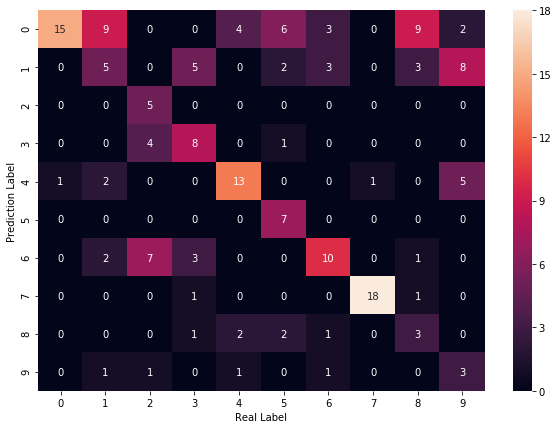

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[0] real:5
#1 min_error:1 index:[1 4 9] real:2
#2 min_error:0 index:[0] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[4] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:1 index:[2 3 6] real:2
#9 min_error:1 index:[1 4 9] real:1
#10 min_error:0 index:[7] real:7
#11 min_error:1 index:[4 7 8 9] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:0 index:[1] real:3
#16 min_error:0 index:[4] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:0 index:[7] real:7
#19 min_error:0 index:[9] real:6
#20 min_error:0 index:[0] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:1 index:[1 4 9] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[0] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[1] real:6
#29 min_error:1 index:[1 4 9] r

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.5912183055040198
Avg Base Learner:0.8512677798392084


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1
Accuracy on training set: 0.18333333333333332
Accuracy on training set: 0.2
Accuracy on training set: 0.45


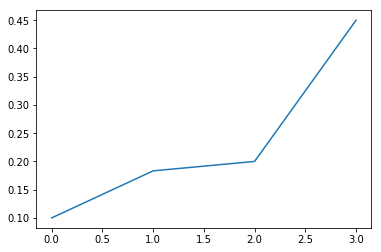

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.1, 0.18333333333333332, 0.2, 0.45]